## Running Cosine Similarity and NYT API Requests


### Looking at NYT API Data


In [1]:
myAPIkey = "G2G9F7zgkQ6gQYd6WWjrwwzLHAtG192b"
import pandas as pd


In [2]:
import requests, json
import string

def getNYTArticles(year, month, apiKey):
    """Function that sends a request to the NYT API for all articles in a month
    and then stores the results in a JSON file.
    """
    # create URL
    URL = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={apiKey}"

    # send the request to get the data
    data = requests.get(URL)
    if data.status_code == 200:
        print(f'Successfully got the data for month {month}.')

    dataJson = data.json() # get response as JSON

    return dataJson

In [3]:
def write_allMonths(year, list_month, apiKey):
    year_headlines = {}
    for month in list_month:
       jsonMonth = getNYTArticles(year, month, apiKey)
       year_headlines[month] = jsonMonth
    return year_headlines
#write_allMonths(2022, [1,2,3,4,5,6,7,8,9,10,11,12], myAPIkey)

In [15]:
dataJson22 = write_allMonths(2022, [1,2,3,4,5,6,7,8,9,10,11,12], myAPIkey)
with open(f"NYT_2022.json", 'w') as fout:
        json.dump(dataJson22, fout)

Successfully got the data for month 1.
Successfully got the data for month 2.
Successfully got the data for month 3.
Successfully got the data for month 4.
Successfully got the data for month 5.
Successfully got the data for month 6.
Successfully got the data for month 7.
Successfully got the data for month 8.
Successfully got the data for month 9.
Successfully got the data for month 10.
Successfully got the data for month 11.
Successfully got the data for month 12.


In [16]:
dataJson23 = write_allMonths(2023, [1,2,3,4,5,6,7,8,9,10,11,12], myAPIkey)
with open(f"NYT_2023.json", 'w') as fout:
        json.dump(dataJson23, fout)

Successfully got the data for month 1.
Successfully got the data for month 2.
Successfully got the data for month 3.
Successfully got the data for month 4.
Successfully got the data for month 5.
Successfully got the data for month 6.
Successfully got the data for month 7.
Successfully got the data for month 8.
Successfully got the data for month 9.
Successfully got the data for month 10.
Successfully got the data for month 11.
Successfully got the data for month 12.


In [120]:
dataJson24 = write_allMonths(2024, [1,2,3], myAPIkey)
with open(f"NYT_2024.json", 'w') as fout:
        json.dump(dataJson24, fout)

Successfully got the data for month 1.
Successfully got the data for month 2.
Successfully got the data for month 3.


In [122]:
def combine_nytFiles(file_names, keys):

    combined_content = {}

    for key, file_name in zip(keys, file_names):
        with open(file_name, 'r') as file:
            content = json.load(file)
            combined_content[key] = content

    with open('combinedNYT.json', 'w') as combined_file:
        json.dump(combined_content, combined_file, indent=4)

    print("Combined JSON file created successfully.")

file_names = ['NYT_2022.json','NYT_2023.json','NYT_2024.json']
keys = ['2022','2023','2024']
combine_nytFiles(file_names, keys)

Combined JSON file created successfully.


In [4]:
def filter_NewsDetails(jsonData):
    json_year = {}
    for year in jsonData.keys():
        months_all = {}
        for month in jsonData[year].keys():
            keywords = []
            headlines = []
            article_types = []
            news_desks = []
            docsList = jsonData[year][month]["response"]["docs"]
            for doc in docsList:
                keywordIndv = [keyword["value"] for keyword in doc["keywords"]]
                keywords.append(keywordIndv)
                
                headlines.append(doc["headline"]["main"])
                article_types.append(doc["type_of_material"])
                news_desks.append(doc["news_desk"])

            month_data = {
                "headlines": headlines,
                "keywords": keywords,
                "article_type": article_types,
                "news_desk": news_desks
            }
            months_all[month] = month_data
        
        json_year[year] = months_all
    
    return json_year



with open('combinedNYT.json', 'r') as file:
    data = json.load(file)
json_all = filter_NewsDetails(data)

In [5]:
with open('allDetailsNYT.json', 'w') as combined_file:
        json.dump(json_all, combined_file, indent=4)

### Looking at Pyktok Info from our Browsed Videos

In [6]:
with open("allDetailsNYT.json", 'r') as file:
    NYTcontent = json.load(file)

In [7]:
import re
def clean_nyt(value):
    fixed = []
    for v in value:
        words = [char for char in v.lower().split() if char not in string.punctuation]
        words = [re.sub(r'[^\w\s]', '', word).lower() for word in words]
        words = [re.sub(r'\d+', '', word) for word in words]
        sentence = ' '.join(words)
        fixed.append(sentence)
    return fixed  
headlines = ['Could Australia and New Zealand Become One Nation?', 'John Isner Says Goodbye to Pro Tennis at the U.S. Open', 'Corrections: Sept. 1, 2023', 'In Visit to Tiny Flock in Mongolia, Pope Has an Eye on Russia and China']
clean_nyt(headlines)


['could australia and new zealand become one nation',
 'john isner says goodbye to pro tennis at the us open',
 'corrections sept  ',
 'in visit to tiny flock in mongolia pope has an eye on russia and china']

In [8]:

def get_nytDetailsMonth(date, json_all):
    date_parts = date.split("-")
    year = date_parts[0]
    month = str(int(date_parts[1]))

    try:
        if year in list(json_all.keys()):
            if month in list(json_all[year].keys()):
                value = json_all[year][month]
                titles = (value['headlines'])
                titles = clean_nyt(titles)
                all_words = (value['keywords'])
                articleTypes = (value['article_type'])
                type_genre = (value['news_desk'])
        else:
            print(f'{year} Year not in Collected Data')
            all_words =[]
            titles = []
            articleTypes = []
            type_genre = []

    except KeyError as e:
        print(f'Error accessing data for year {year}: {e}')

    return all_words, titles, articleTypes, type_genre
        
keywords, headlines, article_type, type_genre = get_nytDetailsMonth("2023-09-20",NYTcontent)


In [9]:
print(len(headlines))
print(len(keywords))
print(len(article_type))

3823
3823
3823


In [10]:
import pandas as pd

df = pd.read_csv('results_CF.csv')

def clean_csvs(df):
    
    num = len(df)
    print('Total number of videos', num)

    df = df.drop_duplicates(subset=['video_id'])
    num_unique = len(df)
    print('Total number of unique videos', num_unique)

    # drop all videos where video_description are NaN
    df.dropna(subset=['video_description'], how='all', inplace=True)
    num_no_sugg_descr = num_unique-len(df)

    print("Total Videos Without description", num_no_sugg_descr)

    # drop all videos not created in US
    df_english = df[df['video_locationcreated'].isin(['US', 'CA', 'GB'])]
    without_US = len(df_english)

    print("Total Videos Not Created In US, CA, or GB:",len(df)-without_US)

    df_english['video_date'] = df_english['video_timestamp'].str[:10]

    print("Total Videos After Cleaning:",len(df_english))

    return df_english

df_english = clean_csvs(df)


Total number of videos 1727
Total number of unique videos 1678
Total Videos Without description 66
Total Videos Not Created In US, CA, or GB: 370
Total Videos After Cleaning: 1242


C:\Users\ashle\AppData\Local\Temp\ipykernel_16944\3262746171.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['video_description'], how='all', inplace=True)
C:\Users\ashle\AppData\Local\Temp\ipykernel_16944\3262746171.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['video_date'] = df_english['video_timestamp'].str[:10]


In [11]:

df_english.to_csv('english_nytTiktokData.csv', index=False)
import pandas as pd
import string
import re
import wordninja

In [12]:
def clean_string(value):
    words = [char for char in value.lower().split() if char not in string.punctuation]
    i = 0  
    while i < len(words):
        if '#' in words[i]:
            words[i] = re.sub(r'\W+', '', words[i])
            if words[i] not in {'fyp', 'foryou', 'fypシ', 'foryoupage', 'fypシviral', 'fypage'}:
                split_words = wordninja.split(words[i])
                del words[i]
                words[i:i] = split_words
        i += 1
    
    words = [re.sub(r'[^\w\s]', '', word).lower() for word in words] # removes all non-characters
    words = [re.sub(r'\d+', '', word) for word in words]
    words = [word for word in words if word not in {'fyp', 'foryou', 'fypシ', 'foryoupage', 'fypシviral', 'fypage'}]
    words = [item for item in words if item]

    sentence = ' '.join(words)
    return sentence
        

In [13]:


def isolate_vars(df):
    df = df[['video_id', 'video_date', 'video_description', 'suggested_words']]
    df = df.dropna(subset=['video_date'])
    
    for index, row in df.iterrows():
        value = row['video_description']
        df.loc[index, 'video_description'] = clean_string(value)


    for index, row in df.iterrows():
        value = row['suggested_words']
        if isinstance(value, str):  # Check if value is a string
            df.loc[index, 'suggested_words'] = clean_string(value)

        else:
            df.loc[index, 'suggested_words'] = None
    
    return df

df = pd.read_csv('english_nytTiktokData.csv')
df_isolate = isolate_vars(df)

In [14]:
column_names = df_isolate.columns.tolist()
print(column_names)

df_isolate.to_csv('cleaned_nytTiktokData.csv', index=False)
df = pd.read_csv('cleaned_nytTiktokData.csv')


['video_id', 'video_date', 'video_description', 'suggested_words']


## Starting cosine and embedding

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

In [16]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [17]:
from numpy.linalg import norm

def cosineSimilarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

In [18]:
def fixpairwiseSimilarity(df,json_all):
    """Given a matrix of embeddings for words or sentences,
    calculate the cosine similarity for each pair.
    """
    df['cos_score'] = None
    df['headline'] = None
    df['headline_type'] = None
    df['headline_genre'] = None
    for index, row in df.iterrows():
        list1 = row['video_description']
        list2 = row['suggested_words']
        if pd.isna(list1):
            video_details = []
        elif pd.isna(list2) and not pd.isna(list1):
            video_details = list1
        else:
            video_details = list1+list2

        date = row['video_date']
        nyt_keywords,nyt_headlines, headline_type, headline_genre = get_nytDetailsMonth(date,json_all)

        try:
            if len(nyt_keywords) > 0 and len(nyt_headlines) > 0 and len(video_details) > 0:
                cos_scoresList = []
                video_detailsEmbed = embed([video_details])[0]
                for headline in nyt_headlines:
                    nyt_headlinesEmbed = embed([headline])[0]
                    cos_indvscore = cosineSimilarity(video_detailsEmbed, nyt_headlinesEmbed)
                    cos_scoresList.append(cos_indvscore)
                    
                cos_score = max(cos_scoresList)
                video_id = row['video_id']
                cos_score = max(cos_scoresList)
                index_of_max_score = cos_scoresList.index(cos_score)
                compare_headline = nyt_headlines[index_of_max_score]
                headlineType = headline_type[index_of_max_score]
                headlineGenre = headline_genre[index_of_max_score]

                print(f'{video_id} has cosine score: {cos_score}============details {video_details}')
                print(f'{compare_headline}')
                print(f'{headlineType}')
                print(f'{headlineGenre}')

            else:
                cos_score = None
            df.at[index, 'cos_score'] = cos_score
            df.at[index, 'headline'] = compare_headline
            df.at[index, 'headline_type'] = headlineType
            df.at[index, 'headline_type'] = headlineGenre
        except Exception as e:
            print(f'Error found on {row["video_id"]}:{e}')
    return df

In [21]:
df_scores = fixpairwiseSimilarity(df,NYTcontent)
print(df_scores)
df_scores.to_csv('results_CF_Scores.csv', index=True)

#category of each headline, to see which headlines were greatest similarity in tiktok, get category/

KeyboardInterrupt: 

In [178]:
#df_scores.to_csv('tiktokNytScores.csv', index=False, float_format='%.0f')
max_score = df_scores['score_news'].max()
print(max_score)
max_score_video_id = df.loc[df['score_news'].idxmax(), 'video_description']
print(max_score_video_id)

0.39215237
taylor swift taylorswift shakeitoff square tiananmensquare tiananmensquare tragedy notcool notcoolbro tragic tragicstory chinese china chinatiktok taylorsversion taylorswifterastour taylorswiftedit politics politicstiktok xijingping xijinping donaldtrump joebiden tank war meme memes memestiktok


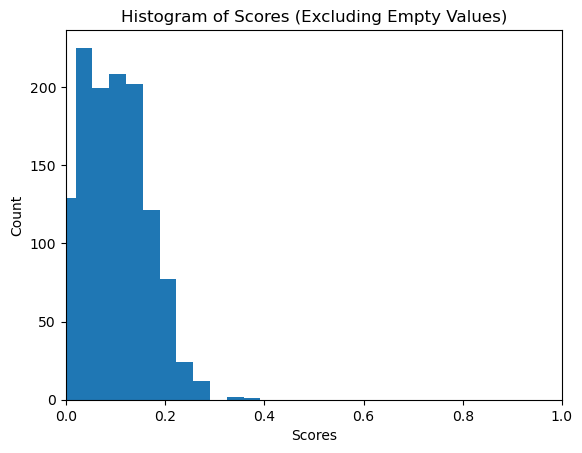

In [189]:
import matplotlib.pyplot as plt

df_filtered = df_scores.dropna(subset=['score_news'])

plt.hist(df_filtered['score_news'], bins=15)  # Adjust number of bins as needed
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Histogram of Scores (Excluding Empty Values)')
plt.xlim(0, 1)

plt.show()